# Comparison of results of the *pendulum* system and choice of *hyper parameters*. 

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

import sys
sys.path.insert(0, '../')

from dmd_machine.dmd_ae_machine import DMDMachine
from dmd_machine.loss_function import LossFunction
from tensorflow.keras.models import model_from_json
from data.Data import DataMaker
from return_stats import *
from create_plots import *
from dmd_functions import *
from tensorflow import keras
import pickle
import numpy as np
from pydmd import DMD
from numpy import matlib

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.facecolor'] = 'white'
%matplotlib inline

# Read in 10 pendulum trajectories. 

In [25]:
rings = np.loadtxt('../data/PendulumRings.csv', delimiter=',')
test_data = rings.reshape((rings.shape[0], int(rings.shape[1]/2), 2))
test_data = tf.cast(test_data, dtype=tf.float32)
test_data = tf.transpose(test_data, perm=[0, 2, 1])
print(test_data.shape)

(10, 2, 1500)


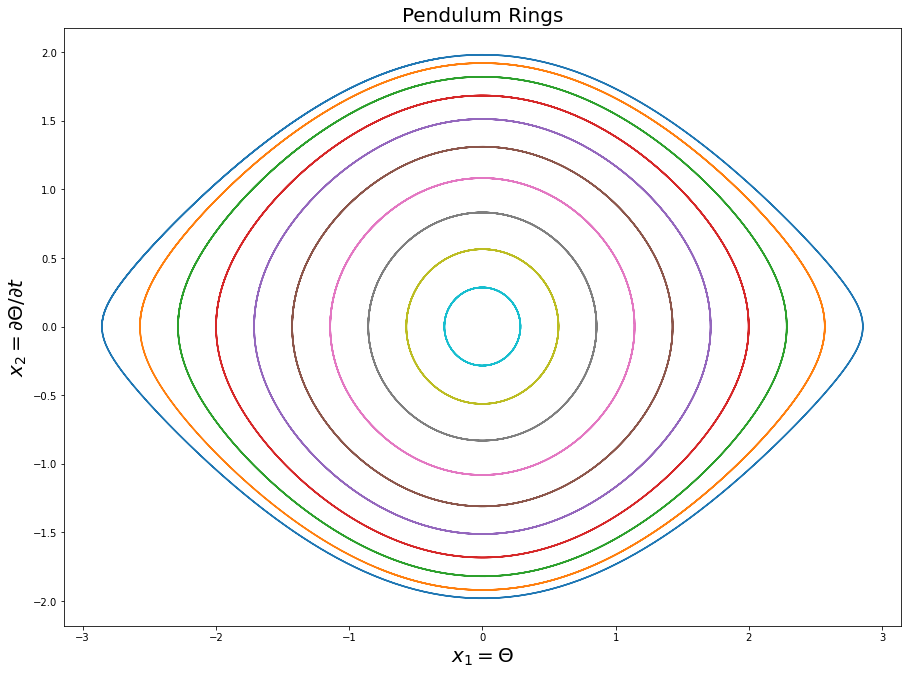

In [26]:
_ = plt.figure(figsize=(15,11))
for ii in range(0, 10):
    plt.plot(test_data[ii, 0, :], test_data[ii, 1, :])
plt.xlabel("$x_{1} = \Theta $", fontsize=20)
plt.ylabel("$x_{2}= \partial \Theta /\partial t $", fontsize=20)
plt.title("Pendulum Rings", fontsize=20)
plt.show()

In [35]:
# Hyperparameters!

hyp_params = dict()
hyp_params['num_t_steps'] = 51
hyp_params['phys_dim'] = 2
hyp_params['num_init_conds'] = 10
hyp_params['batch_size'] = 10 # MAJOR PARAMETER CHOICE
hyp_params['num_epochs'] = 500  # MAJOR PARAMETER CHOICE
hyp_params['window_size'] = None # MAJOR PARAMETER CHOICE

# Encoding/Decoding Layer Parameters
hyp_params['num_en_layers'] = 2 # MAJOR PARAMETER CHOICE
hyp_params['num_en_neurons'] = 80  # MAJOR PARAMETER CHOICE
hyp_params['latent_dim'] = 2

hyp_params['activation'] = 'elu'
hyp_params['weight_initializer'] = 'he_uniform'
hyp_params['bias_initializer'] = 'he_uniform'
hyp_params['regfac'] = 3e-3

hyp_params['c1'] = 1 # coefficient autoencoder loss.
hyp_params['c2'] = 1 # coefficient of dmd loss. 
hyp_params['c3'] = 1 # coefficient of pred loss. 

In [40]:
# We must call the model first, then load the weights
model = DMDMachine(hyp_params)
_ = model(test_data[:, :, :51])
model.autoencoder = keras.models.load_model("../models/my_model_Ex2_oct21", compile=False)

In [41]:
test_run = model(test_data[:, :, :51])

ValueError: Dimension 0 in both shapes must be equal, but are 10 and 256. Shapes are [10,2,51] and [256,2,51].